In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import sys
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, LearningRateScheduler
from sklearn.preprocessing import LabelBinarizer

def preprocess_train(path):
    arrays_t, labels_t, arrays_v, labels_v = [], [], [], []
    lab = np.zeros(5)
    arr = []
    i = 0
    c = 0
    images = pd.read_csv(path)
    for index,row in images.iterrows():
#         if lab[row['label']] < 1492:
        if lab[row['label']] < 1492:
            lab[row['label']] = lab[row['label']] + 1        
#             image_path = os.path.join('../input/cassava-leaf-disease-classification/train_images',row['image_id'])
            image_path = os.path.join('../input/cassava-leaf-disease-merged/train',row['image_id'])
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
            image = cv2.resize(image, (image_size, image_size))
            if lab[row['label']] < 1000:
                arrays_t.append(image)
                labels_t.append(row['label'])
                c = c + 1
            else:
                arrays_v.append(image)
                labels_v.append(row['label'])
                i = i + 1
            
    arrays_t = np.array(arrays_t, dtype="float32")
    labels_t = np.array(labels_t)    
    arrays_v = np.array(arrays_v, dtype="float32")
    labels_v = np.array(labels_v)    
    return arrays_t, labels_t,arrays_v, labels_v

# # path_train = '../input/cassava-leaf-disease-classification/train.csv'
# # train_data, X_sparse, train_y = resample(train_data, False, train_y, random_state=0)
# path_train = '../input/cassava-leaf-disease-merged/merged.csv'
# train_data, train_labels, valid_data, valid_labels = preprocess_train(path_train)
# train_data, X_sparse, train_y = resample(train_data, False, train_y, random_state=0)
# from random_eraser import get_random_eraser
# train_datagen =ImageDataGenerator(rescale=1./255,rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True,vertical_flip=False,fill_mode='nearest',preprocessing_function = 
# datagen = ImageDataGenerator(rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
# train_augment = ImageDataGenerator(zoom_range=0.1,horizontal_flip = True,vertical_flip = True,validation_split = 0.0)
# train_data, X_sparse, train_y = resample(train_data, False, train_y, random_state=0)
# mean=[0.4543, 0.5137, 0.3240]
# std=[0.1949, 0.1977, 0.1661]
# from torchvision import transforms, datasets, models
# train_transforms = transforms.Compose([transforms.RandomResizedCrop(320),transforms.RandomRotation(30),transforms.RandomHorizontalFlip(),transforms.ToTensor(),transforms.Normalize(mean=mean,std=std)])
# test_transforms = transforms.Compose([ transforms.Resize(320),transforms.CenterCrop(320),transforms.ToTensor(),transforms.Normalize(mean=mean,std=std)])

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(data)
# normalized = scaler.transform(data)
# inverse = scaler.inverse_transform(normalized)

# preprocess = transforms.Compose([ transforms.Resize(224),transforms.CenterCrop(224),transforms.ToTensor(),transforms.Normalize(mean=mean,std=std)])
# image = preprocess(image)
# normalize = transforms.Normalize(mean=mean, std=std)
#     [ 1492.  3476.  3017. 15462.  2890.]

# model.add(UpSampling2D())
# model.add(UpSampling2D((32, 32), input_shape=input_image_shape, interpolation='bilinear'))
# layers.UpSampling2D(size=(1, 2))(x)
# x = layers.UpSampling2D()(x)
# x = layers.UpSampling2D(size=(2, 2), data_format=None)(x)


In [2]:
# import tensorflow_addons as tfa
# # datagen = ImageDataGenerator(rotation_range=90, fill_mode='nearest')
# train_augment = ImageDataGenerator(rotation_range=30,zoom_range=0.15,width_shift_range=0
#                 ,height_shift_range=0,shear_range=0.15,horizontal_flip=True,fill_mode="nearest")
# aug_iter = train_augment.flow(train_data[:2], batch_size=1)
# # print(train_augment)
# # print(aug_iter)
# fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))
# for i in range(3):
#     image = next(aug_iter)[0]
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#     ax[i].imshow(image)
#     images = tfa.image.random_cutout(image,  
# #                                      tf.sets.union(
#         np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
        
#         4,4))
# #     image.convert('LA')
# #     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# #     image = cv2.resize(image, (image_size, image_size))
# #     .astype('uint8')
#     ax[i].imshow(image)
#     ax[i].axis('off')


In [3]:
image_size = 100
def preprocess(path):
    arrays_t, labels_t, arrays_v, labels_v = [], [], [], []
    lab = np.zeros(5)
    c = 0
    i = 0
    images = pd.read_csv(path)
    for index,row in images.iterrows():
        if lab[row['label']] < 5000:
            image = cv2.imread(os.path.join('../input/cassava-leaf-disease-merged/train',row['image_id']))
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
            image = cv2.resize(image, (image_size, image_size))
            arrays_t.append(image)
            labels_t.append(row['label'])
            c = c + 1
        elif lab[row['label']] < 5400:
            image = cv2.imread(os.path.join('../input/cassava-leaf-disease-merged/train',row['image_id']))
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
            image = cv2.resize(image, (image_size, image_size))
            arrays_v.append(image)
            labels_v.append(row['label'])
            i = i + 1
        lab[row['label']] = lab[row['label']] + 1        
    print(lab)
    arrays_t = np.array(arrays_t, dtype="float32")
    labels_t = np.array(labels_t)    
    arrays_v = np.array(arrays_v, dtype="float32")
    labels_v = np.array(labels_v)    
    return arrays_t, labels_t,arrays_v, labels_v

# path_train = '../input/updated-merged/merged_updated.csv'
# train_data, train_labels, valid_data, valid_labels = preprocess(path_train)

# path_train = '../input/cassava-leaf-disease-classification/train.csv'
# train_data, X_sparse, train_y = resample(train_data, False, train_y, random_state=0)
path_train = '../input/cassava-leaf-disease-merged/merged.csv'
train_data, train_labels, valid_data, valid_labels = preprocess_train(path_train)

print(len(train_data))
print(len(train_labels))
print(len(valid_data))
print(len(valid_labels))

Binarizer = LabelBinarizer()
train_y = Binarizer.fit_transform(train_labels)
valid_y = Binarizer.transform(valid_labels)
# shuffling the training data
train_indx = np.arange(len(train_labels))
np.random.shuffle(train_indx)
train_data, train_y = train_data[train_indx], train_y[train_indx]
#rescaling/normalize the images such that the pixel values are between one and zero
train_data = train_data / 255.
valid_data = valid_data / 255.

train_augment = ImageDataGenerator(rotation_range=30,zoom_range=0.15
#                 ,width_shift_range=0.2,height_shift_range=0.2
                  ,shear_range=0.15,horizontal_flip=True,fill_mode="nearest"
#                   ,preprocessing_function=get_random_eraser(v_l=0, v_h=1)
                                  )

# get_random_eraser
valid_augment = ImageDataGenerator()
print(len(train_data))
train_augment.fit(train_data)
print(len(train_data))
valid_augment.fit(valid_data)

4995
4995
2465
2465
4995
4995


In [4]:
# # with tpu_strategy.scope():
# baseModel = InceptionV3(weights="imagenet", include_top=False, input_shape = (image_size, image_size, 3))
# x = baseModel.output
# x = layers.GlobalMaxPooling2D()(x)
# x = layers.Dense(512, activation="relu")(x)
# x = layers.Dropout(0.5)(x)
# x = layers.Dense(5, activation="softmax")(x)
# model = Model(baseModel.input, x)
# for layer in baseModel.layers:
#         layer.trainable = True

# optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
# model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['acc'])
# learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.000001, cooldown=2)
# early_stopping = EarlyStopping(monitor='val_acc',verbose=1,patience=3,mode='max',restore_best_weights=True)
# early_stopping1 = EarlyStopping(monitor='val_loss',verbose=1,patience=3,mode='min',restore_best_weights=True)
# BATCH_SIZE = 64
# # BATCH_SIZE = 128
# NEPOCHS = 60
# callbacks = [learning_rate_reduction, early_stopping]
# steps_per_epoch = (train_data.shape[0] // BATCH_SIZE)                       
# # validation_steps = (valid_data.shape[0] // BATCH_SIZE)                              
# # valid_aug = valid_augment.flow(valid_data, valid_y)
# # reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_lr=0.001)

# history = model.fit(
#     train_augment.flow(train_data, train_y, batch_size=BATCH_SIZE),
#                     batch_size=BATCH_SIZE, 
#                     steps_per_epoch=steps_per_epoch, 
#                     epochs=NEPOCHS,
#                     validation_data=valid_augment.flow(valid_data, valid_y),
#                     shuffle = True,
#                     verbose=1
#     ,callbacks=[early_stopping1]
#                    )

# model.save('saved_model.h5')
# # history = model.fit_generator(train_augment.flow(train_data, train_y, batch_size=BATCH_SIZE),epochs = NEPOCHS,validation_data=valid_aug,verbose=1,steps_per_epoch=steps_per_epoch,validation_steps=validation_steps,callbacks=callbacks)


In [5]:
from keras.applications.vgg16 import VGG16
from keras.layers import Input, Dropout
from keras.layers.pooling import GlobalAveragePooling2D, GlobalMaxPooling2D, MaxPooling2D
from keras.layers.core import Dense, Lambda


model = VGG16(weights = 'imagenet',include_top = True)

epochs = 10
# img_size = 336
img_size = 100
input_tensor = Input(shape=(img_size, img_size, 3))
base_model = VGG16(weights='imagenet',include_top = False,input_tensor = input_tensor)
    
for layer in base_model.layers:
    layer.trainable = True
    
base_model.layers[0].trainable = True
base_model.layers[1].trainable = True
# base_model.layers[0].trainable = False
# base_model.layers[1].trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)

# x = Dense(1024,activation = 'relu')(x)
# x = Dropout(0.5)(x)
# x = Dense(512,activation = 'relu')(x)

output = Dense(5,activation='softmax')(x)
model = Model(inputs=base_model.input,outputs=output)
# model.summary()

# import matplotlib.pyplot as plt
# for i in range (0,20):
#     image = x_batch[i]
#     plt.imshow(image)
#     plt.show()

model.compile(loss='binary_crossentropy',optimizer = Adam(lr = 1e-5),metrics = ['accuracy'])
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.000001, cooldown=2)
early_stopping = EarlyStopping(monitor='val_acc',verbose=1,patience=3,mode='max',restore_best_weights=True)
early_stopping1 = EarlyStopping(monitor='val_loss',verbose=1,patience=3,mode='min',restore_best_weights=True)
BATCH_SIZE = 64
# BATCH_SIZE = 128
NEPOCHS = 60
callbacks = [learning_rate_reduction, early_stopping]
steps_per_epoch = (train_data.shape[0] // BATCH_SIZE)                       
# validation_steps = (valid_data.shape[0] // BATCH_SIZE)                              
# valid_aug = valid_augment.flow(valid_data, valid_y)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_lr=0.001)

history = model.fit(
    train_augment.flow(train_data, train_y, batch_size=BATCH_SIZE),
                    batch_size=BATCH_SIZE, 
                    steps_per_epoch=steps_per_epoch, 
                    epochs=NEPOCHS,
                    validation_data=valid_augment.flow(valid_data, valid_y),
                    shuffle = True,
                    verbose=1
    ,callbacks=[early_stopping1]
                   )

model.save('saved_model.h5')



58892288/58889256 [==============================] - 1s 0us/step
Epoch 1/60
78/78 [==============================] - 22s 221ms/step - loss: 0.5341 - accuracy: 0.2674 - val_loss: 0.4429 - val_accuracy: 0.4037
Epoch 2/60
78/78 [==============================] - 16s 207ms/step - loss: 0.4377 - accuracy: 0.4190 - val_loss: 0.4490 - val_accuracy: 0.3972
Epoch 3/60
78/78 [==============================] - 16s 201ms/step - loss: 0.4237 - accuracy: 0.4462 - val_loss: 0.4199 - val_accuracy: 0.4661
Epoch 4/60
78/78 [==============================] - 16s 201ms/step - loss: 0.4042 - accuracy: 0.5000 - val_loss: 0.4233 - val_accuracy: 0.4706
Epoch 5/60
78/78 [==============================] - 16s 201ms/step - loss: 0.3891 - accuracy: 0.5183 - val_loss: 0.4194 - val_accuracy: 0.4710
Epoch 6/60
78/78 [==============================] - 16s 200ms/step - loss: 0.3782 - accuracy: 0.5426 - val_loss: 0.4115 - val_accuracy: 0.4892
Epoch 7/60
78/78 [==============================] - 16s 203ms/step - loss: 0.

In [6]:
# def preprocess_test(path):
#     arrays_t = []
#     labels = []
#     i = 0
#     for dirname, _, filenames in (os.walk(path)):
#         for filename in filenames:
# #             if i >= 5:
#             if i >= len(filenames):
#                 break
#             i = i + 1
#             image_path = os.path.join(path, filename)
#             image = cv2.imread(image_path)
#             image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#             image = cv2.resize(image, (image_size, image_size))
#             arrays_t.append(image)  
#             labels.append(filename)  
#     arrays_t = np.array(arrays_t, dtype="float32")
#     return arrays_t,labels
# path = '/kaggle/input/cassava-leaf-disease-classification/test_images'
# test_data,test_labels = preprocess_test(path)
# test_data = test_data / 255.

# y_perd = model.predict(test_data)
# classes = [np.argmax(element) for element in y_perd]
# output = pd.DataFrame({'image_id': test_labels, 'label': classes})
# print(output)
# output.to_csv('submission.csv', index=False)

In [7]:
#Validate The Model Accuracy

# def preprocess_test(path):
#     arrays_t = []
#     labels = []
#     i = 0
#     for dirname, _, filenames in (os.walk(path)):
#         for filename in filenames:
#             if i >= 3995:
# #             if i >= len(filenames):
#                 break
#             i = i + 1
#             image_path = os.path.join(path, filename)
#             image = cv2.imread(image_path)
#             image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#             image = cv2.resize(image, (image_size, image_size))
#             arrays_t.append(image)  
#             labels.append(filename)
#     arrays_t = np.array(arrays_t, dtype="float32")
#     return arrays_t,labels
# path = '/kaggle/input/cassava-leaf-disease-classification/train_images'
test_data = train_data[:3995]
test_labels = train_labels[:3995]
test_y = train_labels[:3995]
# test_data = test_data / 255.
y_pred = [np.argmax(i) for i in model.predict(test_data)]
output = pd.DataFrame({'image_id': test_labels, 'expected label': y_pred, 'real label':test_y })

In [8]:
true = 0
false = 0
print(len(output))
for index,row in output.iterrows():
    if row['expected label'] == row['real label']:
        true = true + 1
    else:
        false = false + 1
print("Expected as Real:  " + str(true))
print("Expected not as Real: " + str(false))
print(true/7460)

# s = model.evaluate(x=train_data, y=train_y)
# print(s)
# from matplotlib.colors import LogNorm
# from sklearn.metrics import classification_report, confusion_matrix
# confusion_matrix(y_pred, test_y)
# report = classification_report(test_y, y_pred,labels = [0,1,2,3,4],target_names = ['1','2','3','4','5'])
# print(report)


3995
Expected as Real:  817
Expected not as Real: 3178
0.10951742627345845


In [9]:
# import os
# import pandas as pd
# # output = (os.walk(path)):
# # print(output)    
# path = '../input/cassava-leaf-disease-merged/merged.csv'
# rows = pd.read_csv(path)
# print(len(rows))
# print(rows)
    
# # [1492, 3476, 3017, 15462, 2890]
# labels = [0,0,0,0,0]
# for index,row in rows.iterrows():
#     labels[row['label']] = labels[row['label']] + 1

# print(labels)
model.summary()

# !pip install tqdm
# from tqdm import tqdm

# train_datagen = ImageDataGenerator(
#         shear_range=0.1,
#         zoom_range=0.1,
#         horizontal_flip=True,
#         rotation_range=10.,
#         fill_mode='reflect',
#         width_shift_range = 0.1, 
#         height_shift_range = 0.1)

# train_datagen.fit(train_data)

# tta_steps = 10
# predictions = []

# for i in tqdm(range(tta_steps)):
#     preds = model.predict_generator(train_datagen.flow(valid_data,batch_size=BATCH_SIZE,shuffle=False), 
#                                     steps = len(valid_data)/BATCH_SIZE)
#     predictions.append(preds)
# pred = np.mean(predictions, axis=0)
# np.mean(np.equal(np.argmax(valid_y, axis=-1), np.argmax(pred, axis=-1)))


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

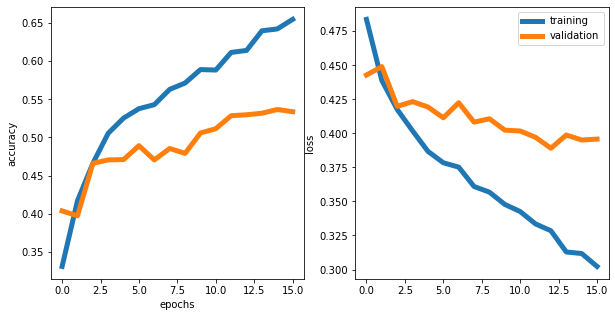

In [10]:
fig, axs = plt.subplots(nrows = 1, ncols =2 , figsize = (10,5))
axs[0].plot(range(len(history.history['accuracy'])), history.history['accuracy'], linewidth = 5, label = "training")
axs[0].plot(range(len(history.history['accuracy'])), history.history['val_accuracy'], linewidth = 5, label = "validation")
axs[1].plot(range(len(history.history['loss'])), history.history['loss'], linewidth = 5, label = "training")
axs[1].plot(range(len(history.history['loss'])), history.history['val_loss'], linewidth = 5, label = "validation")
axs[0].set_xlabel("epochs")
axs[0].set_xlabel("epochs")
axs[0].set_ylabel("accuracy")
axs[1].set_ylabel("loss")
plt.legend()


In [11]:
# model = VGG16(weights = 'imagenet',include_top = True)

# epochs = 10
# img_size = 336
# input_tensor = Input(shape=(img_size, img_size, 3))
# base_model = VGG16(weights='imagenet',include_top = False,input_tensor = input_tensor)
    
# for layer in base_model.layers:
#     layer.trainable = True
    
# base_model.layers[0].trainable = False
# base_model.layers[1].trainable = False

# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# # x = Dense(1024,activation = 'relu')(x)
# # x = Dropout(0.5)(x)
# # x = Dense(512,activation = 'relu')(x)
# output = Dense(5,activation='softmax')(x)
# model = Model(inputs=base_model.input,outputs=output)
# model.summary()
# model.compile(loss='binary_crossentropy',optimizer = Adam(lr = 1e-5),metrics = ['accuracy'])
# history = model.fit(train_augment.flow(train_data, train_y, batch_size=BATCH_SIZE),
#                     batch_size=BATCH_SIZE,steps_per_epoch=steps_per_epoch, 
#                     epochs=NEPOCHS,validation_data=valid_augment.flow(valid_data, valid_y),
#                     shuffle = True,verbose=1,callbacks=[early_stopping1])

# model.save('saved_model_vgg16.h5')